In [36]:
from model_tbyt_2 import GPT, GPTConfig
import torch
import os
itr_num = 20000
#block_size = 8
#vocab_size = 128
block_size = 32
vocab_size = 128
device = 'cpu'
config = GPTConfig(block_size=block_size, vocab_size=vocab_size)
model = GPT(config)
model_state_dict = torch.load(os.path.join(os.getcwd(), f'saved_models/tbyt_1head_2_itr:{itr_num}_checkpoint.pt'), map_location=device)['model']
#model_state_dict = torch.load('./saved_models/tbyt_b64_v2048_embd16_1head_2_itr:20000_checkpoint.pt', map_location=device)['model']
model.load_state_dict(model_state_dict)
model.to(device=device)

Im in GPT instructor
i initialized n-layers
im in block instructor
i initialized everying in block
im in block instructor
i initialized everying in block
i initialized transformer
I have initialized all the variables in GPT instructor


GPT(
  (transformer): ModuleDict(
    (wte): Embedding(129, 64)
    (wpe): Embedding(129, 64)
    (h): ModuleList(
      (0-1): 2 x Block(
        (c_attn): CasualSelfAttention(
          (c_attn): Linear(in_features=64, out_features=192, bias=True)
          (c_proj): Linear(in_features=64, out_features=64, bias=True)
        )
        (c_fc): MLP(
          (fc_1): Linear(in_features=64, out_features=192, bias=True)
          (gelu): GELU(approximate='tanh')
          (fc_2): Linear(in_features=192, out_features=64, bias=True)
        )
        (ln_1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (ln_2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      )
    )
    (ln_f): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=64, out_features=128, bias=False)
)

In [37]:
batch_size = 1
#test_1_seq = torch.cat((torch.arange(110, 30, -5) , torch.arange(127, 111, -1)), dim=0) 
#print(test_1_seq)
def get_batch():
   def cat_sorted_tensor(x):
      #x, _ = torch.sort(x, descending=True)
      #x = torch.tensor([100,100,100,100,1,1,1,1])
      vals, _ = torch.sort(x)
      #vals2, _ = torch.sort(x, descending=True)
      #print('vals are ', vals)
      return torch.cat((x, torch.tensor([vocab_size]), vals), dim=0)
   #x = torch.stack([cat_sorted_tensor(torch.randperm(vocab_size)[:block_size]) for _ in range(batch_size)])
   x = torch.stack([cat_sorted_tensor(torch.randperm(vocab_size)[:32]) for _ in range(batch_size)])
   return x

pos_sizes matshow:


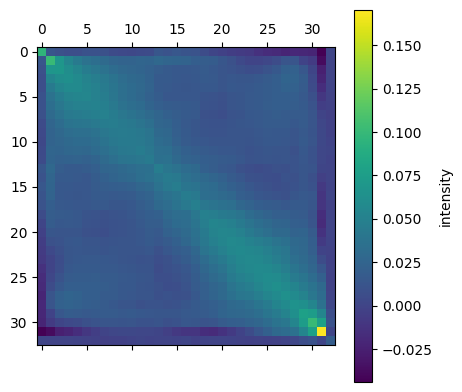

x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
attn scores of layer 0 is tensor([[[[1.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [7.0030e-02, 9.2997e-01, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [1.1492e-07, 6.0341e-03, 9.9397e-01,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [5.0149e-04, 3.3025e-01, 4.1262e-07,  ..., 7.3708e-03,
           0.0000e+00, 0.0000e+00],
          [3.6232e-02, 2.9974e-01, 2.5273e-08,  ..., 8.5426e-03,
           3.6102e-02, 0.0000e+00],
          [4.1566e-02, 1.8429e-01, 8.7174e-08,  ..., 6.9646e-03,
           2.2055e-02, 3.1500e-01]]]], grad_fn=<SoftmaxBackward0>)
im here!!!  torch.Size([1, 1, 65, 65])


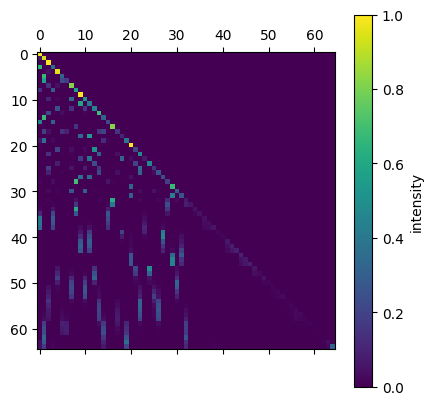

x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
attn scores of layer 1 is tensor([[[[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.5169, 0.4831, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.3071, 0.3277, 0.3651,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0379, 0.0402, 0.0067,  ..., 0.0684, 0.0000, 0.0000],
          [0.0404, 0.0384, 0.0048,  ..., 0.0389, 0.0344, 0.0000],
          [0.0402, 0.0389, 0.0029,  ..., 0.0381, 0.0358, 0.0510]]]],
       grad_fn=<SoftmaxBackward0>)
im here!!!  torch.Size([1, 1, 65, 65])


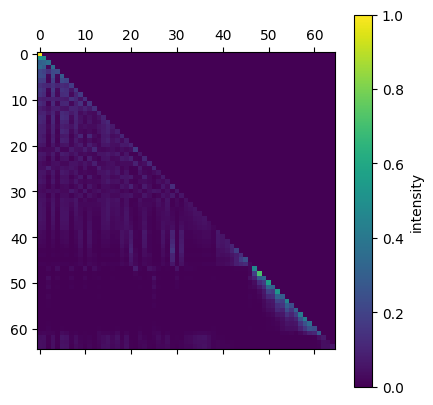

x size is  torch.Size([1, 65, 64])
x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
attn scores of layer 0 is tensor([[[[1.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [6.5646e-02, 9.3435e-01, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [8.8609e-08, 4.4991e-03, 9.9550e-01,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [4.8096e-04, 3.4352e-01, 3.8928e-07,  ..., 7.6670e-03,
           0.0000e+00, 0.0000e+00],
          [3.4400e-02, 3.2686e-01, 2.3687e-08,  ..., 9.3154e-03,
           3.9368e-02, 0.0000e+00],
          [3.8720e-02, 1.9319e-01, 8.0187e-08,  ..., 7.3008e-03,
           2.3120e-02, 3.3021e-01]]]])
im here!!!  torch.Size([1, 1, 65, 65])


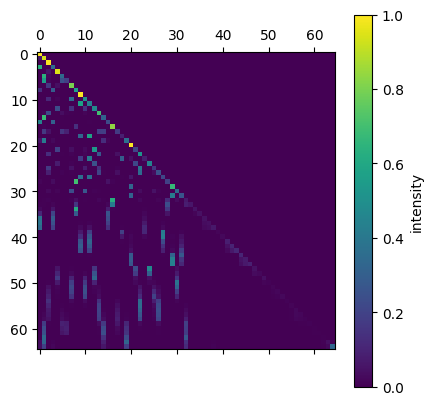

x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
attn scores of layer 1 is tensor([[[[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.4730, 0.5270, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.2676, 0.2935, 0.4389,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0342, 0.0423, 0.0107,  ..., 0.0434, 0.0000, 0.0000],
          [0.0409, 0.0464, 0.0057,  ..., 0.0247, 0.0325, 0.0000],
          [0.0411, 0.0485, 0.0038,  ..., 0.0227, 0.0339, 0.0416]]]])
im here!!!  torch.Size([1, 1, 65, 65])


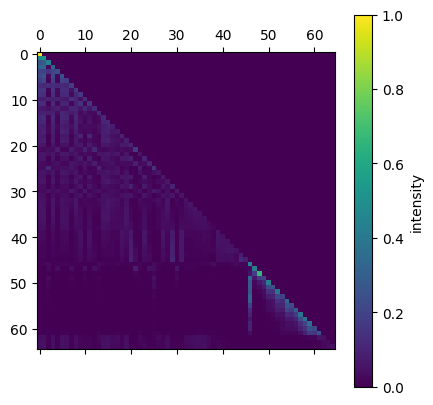

loss is  13.457076072692871
idx is: tensor([[ 19, 122,  91,  18,  75, 105, 108,  82,  13,  35,  83,  34,  72,  95,
         117,  17,   4, 100,  31, 124,  42,  68,  93,  27,  66,  89,  94,  33,
          10,  43,  80,  40, 128,   4,  10,  13,  17,  18,  19,  27,  31,  33,
          34,  35,  40,  42,  43,  66,  68,  72,  75,  80,  82,  83,  89,  91,
          93,  94,  95, 100, 105, 108, 117, 122, 124]])
result is: tensor([[ 16, 123,   4,  16,   3, 123, 124,  11,   7,  26,  11,  25,  12, 120,
         123,  16,   4, 122,  26, 124,  32,  62,   4,  26,  12,   4,   4,  25,
           7,  32,   3,  24,   4,  10,  13,  17,  18,  19,  35,  31,  33,  35,
          37,  42,  42,  45, 108,  68,  72,  75,  80,  82,  85,  92,  94,  94,
          95,  96, 114, 106, 108, 116, 121, 123, 124]])


In [38]:

##just testing the output
idx = get_batch()
#x, _ = torch.sort(x[0])
#x = torch.unsqueeze(x, dim=0)

logits, loss = model(idx)
logits, loss = model.without_pos_embd(idx)
print('loss is ', loss.item())
print(f'idx is: {idx}')
print(f'result is: {torch.argmax(logits, dim=-1)}')

x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
y is  tensor([[[-41.7095,  28.3603, -40.8277,  ...,  -0.2002,  33.2689, -40.6089],
         [-40.5360,  32.5772, -37.5167,  ...,  -0.3315,  35.3155, -47.8933],
         [-42.7194,  33.6327, -39.8425,  ...,   3.7847,  33.5289, -48.8603],
         ...,
         [-15.9377,  15.5737, -16.5924,  ...,  -6.7687,  13.8891,  -6.3498],
         [-24.7355,  22.8390, -24.2396,  ...,   1.8419,  19.3463, -25.7561],
         [  0.9190,   2.4825,  -2.7166,  ...,  -5.2190,   0.7623,   6.2476]]],
       grad_fn=<AddBackward0>)
x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
attn scores of layer 0 is tensor([[[[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.5928, 0.4072, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.4368, 0.3930, 0.1702,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.2995, 0.2

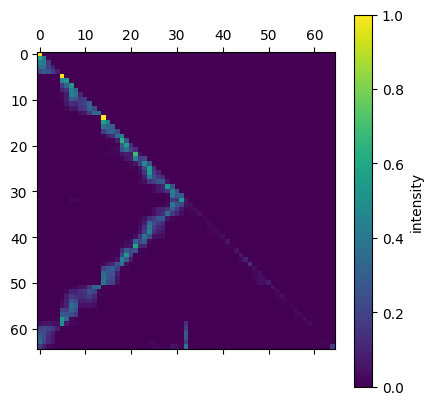

second x is  tensor([[[-41.7095,  28.3603, -40.8277,  ...,  -0.2002,  33.2689, -40.6089],
         [-40.5360,  32.5772, -37.5167,  ...,  -0.3315,  35.3155, -47.8933],
         [-42.7194,  33.6327, -39.8425,  ...,   3.7847,  33.5289, -48.8603],
         ...,
         [-15.9377,  15.5737, -16.5924,  ...,  -6.7687,  13.8891,  -6.3498],
         [-24.7355,  22.8390, -24.2396,  ...,   1.8419,  19.3463, -25.7561],
         [  0.9190,   2.4825,  -2.7166,  ...,  -5.2190,   0.7623,   6.2476]]],
       grad_fn=<AddBackward0>)


In [5]:
## manually calculating the layer norms!!

B, T = idx.size()
pos = model.transformer.wpe(torch.arange(T).to(device))
x = model.transformer.wte(idx) + pos
y = model.transformer.h[0](x)
print('y is ', y)
x0 = x
x = x - model.means[0, :, :]
x = x / model.norms[0, :, :]
x = x * model.transformer.h[0].ln_1.weight + model.transformer.h[0].ln_1.bias
x = x0 + model.transformer.h[0].c_attn(x, 0)
## now MLP
x1 = x
x = x - model.transformer.h[0].meanval
x = x / model.transformer.h[0].normval
x = x * model.transformer.h[0].ln_2.weight + model.transformer.h[0].ln_2.bias
x = x1 + model.transformer.h[0].c_fc(x)
print('second x is ', x)

In [18]:
qweights, kweights, vweights = model.transformer.h[0].c_attn.c_attn.weight.split(model.config.n_embd, dim=0)
model.transformer.wte.weight.shape

torch.Size([129, 64])

In [101]:
#tmp1 = model.transformer.wpe.weight / torch.norm(model.transformer.wpe.weight, dim=1).view(model.transformer.wpe.weight.size(0), 1)
#print(torch.norm(tmp1[14,:] - tmp1[8,:]))
print(torch.norm(model.transformer.wpe.weight[34,:]))
#S, V, D = torch.linalg.svd(model.transformer.wpe.weight[:32,:])
#plt.plot(V.detach().numpy())

tensor(0.2633, grad_fn=<LinalgVectorNormBackward0>)


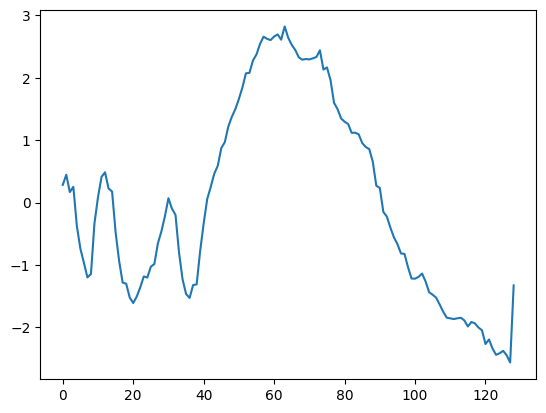

In [29]:
import torch.nn.functional as F
#scores = (F.normalize(model.transformer.wpe.weight @  qweights.t(), p=2, dim=1) @ F.normalize(qweights @ model.transformer.wpe.weight.t(), p=2, dim=0)).detach().numpy()
#scores = ((model.transformer.wpe.weight @  qweights.t()) / torch.norm((model.transformer.wte.weight + model.transformer.wpe.weight), dim=1).view(model.transformer.wpe.weight.size(0), 1) 
          #@ kweights @ model.transformer.wpe.weight.t() / torch.norm((model.transformer.wpe.weight + model.transformer.wte.weight), dim=1).view(1, model.transformer.wpe.weight.size(0))).detach().numpy()

scores = (model.transformer.wte.weight @  qweights.t() @ kweights @ model.transformer.wte.weight.t()).detach().numpy()
import matplotlib.pyplot as plt
#plt.matshow(scores[50:60,31:60])
#plt.colorbar()
#plt.show()
plt.plot(scores[60, :])

In [8]:
torch.norm(model.transformer.wpe.weight / (torch.norm(model.transformer.wpe.weight + model.transformer.wte.weight, dim=1)).view(model.transformer.wpe.weight.size(0),1),dim=1).detach().numpy()

array([0.09380595, 0.1175398 , 0.1111477 , 0.11072489, 0.12972789,
       0.14281744, 0.14264655, 0.14315976, 0.15983695, 0.1273104 ,
       0.11826848, 0.11001614, 0.11493754, 0.13890882, 0.1069848 ,
       0.13382465, 0.12466118, 0.16113156, 0.16665271, 0.15363413,
       0.14333148, 0.145072  , 0.1630689 , 0.13488898, 0.13205463,
       0.14375505, 0.14190345, 0.16853623, 0.14609438, 0.155492  ,
       0.13639732, 0.13969693, 0.9229926 , 0.6360636 , 0.57455945,
       0.5410947 , 0.49532947, 0.482621  , 0.49725154, 0.48084083,
       0.45793873, 0.44308767, 0.4457935 , 0.46445963, 0.47107413,
       0.45597824, 0.43937048, 0.48023117, 0.46124333, 0.4655326 ,
       0.46210358, 0.45475888, 0.45237532, 0.4634895 , 0.4588894 ,
       0.46559435, 0.46316785, 0.4861825 , 0.5009505 , 0.55047524,
       0.55729973, 0.63471705, 0.73984474, 0.8540314 , 0.3446905 ,
       0.33390966, 0.3593928 , 0.3675981 , 0.37349707, 0.33640704,
       0.38013622, 0.33328533, 0.33377105, 0.28571755, 0.32462

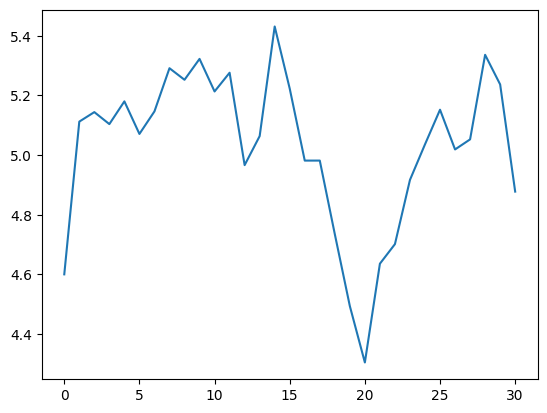

In [ ]:
## print PE norms
import matplotlib.pyplot as plt
plt.plot(torch.norm(model.transformer.wpe.weight @ qweights.t() / torch.norm((model.transformer.wpe.weight + model.transformer.wte.weight), dim=1).view(model.transformer.wpe.weight.size(0), 1), dim=1).detach().numpy()[33:64])

x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])


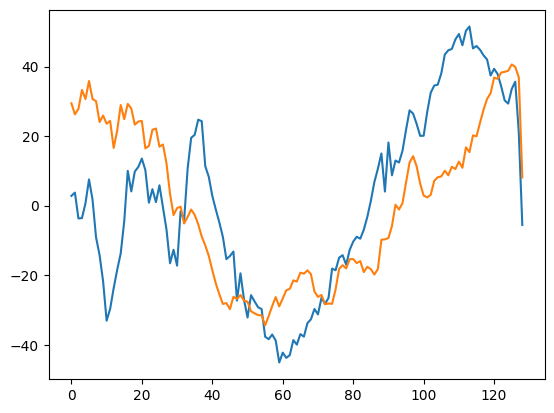

In [ ]:
## obtaining weights of second layer
half_res_stream = model.transformer.h[0].c_attn(model.transformer.h[0].ln_1(model.transformer.wte(idx) + model.transformer.wpe(torch.arange(65).to(device))))[0,...]
res_stream_1 = (model.transformer.h[0](model.transformer.wte(idx) + model.transformer.wpe(torch.arange(65).to(device))))
res_stream_1 = res_stream_1[0,...]
#scores = (res_stream_1 @  qweights.t() @ qweights @ res_stream_1.t()).detach().numpy()
## assuming almost orthogonality
scores = (half_res_stream @ model.transformer.wte.weight.t()).detach().numpy()
scores2 = (res_stream_1 @ model.transformer.wte.weight.t()).detach().numpy()

import matplotlib.pyplot as plt
#plt.matshow(scores[:, :])
plt.plot(-scores[50,:] * 400.0)
plt.plot(scores2[50,:])
#plt.colorbar()
plt.show()
#plt.plot(scores[22, :])

In [20]:
hidden_projections = model.proj_on_embedding(idx, index=9)

x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])


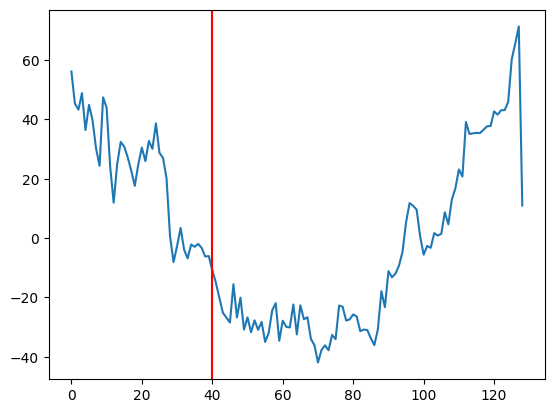

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(vocab_size + 1), hidden_projections[0, 1, :])
plt.axvline(x = 40.0, color='r')

In [4]:
proj_max_results = []
for layer in range(config.n_layers + 1):
    proj_max_result = []
    for index in range(config.block_size * 2 + 1):
        hidden_projections = model.proj_on_embedding(idx, index=index)
        proj_max_result.append(torch.argmax(hidden_projections[0, layer, :]).item())
    if layer > 0:
        proj_max_results.append([-1, *proj_max_result])
    else:
        proj_max_results.append([*proj_max_result, -1])
proj_max_results = torch.tensor(proj_max_results)


x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 6

In [5]:
proj_max_results

tensor([[124, 123, 119, 110, 109, 103, 101,  99,  93,  82,  78,  77,  76,  74,
          73,  68,  62,  59,  58,  57,  52,  47,  46,  43,  29,  27,  20,  19,
          16,  14,  10,   2, 128,   0,  10,  14,  16,  19,  20,  27,  29,  43,
          46,  47,  52,  57,  58,  59,  62,  68,  73,  74,  76,  76,  78,  82,
          93,  99, 101, 103, 109, 110, 120, 123, 124,  -1],
        [ -1, 127, 127, 127, 127, 127, 127, 127,   3,  11,  11,  11,   3,   3,
           0,   0,   3,   3,  10,  10,   3, 127, 127,  31, 127,  15,  15,  14,
          14,  14,  15,   3,  10,   0,  10,  14,  14,  14,  14,  27,  14,  36,
          46,  52,  46,  54,   0,  10,   0,  56,  76,  76,  75,  76,  76,  75,
          88,   1,  86,  87,  88, 108, 126, 126, 127, 126],
        [ -1, 124, 124, 124, 124, 124, 124, 123, 123,   7,  11,  11,   3,  67,
          67,  67,  67,  12,  12,  12,  12,  49,  49,  44,  32,  25,  20,  15,
          15,  16,  16,   9,   6,   2,   9,  14,  16,  19,  20,  27,  29,  43,
          4

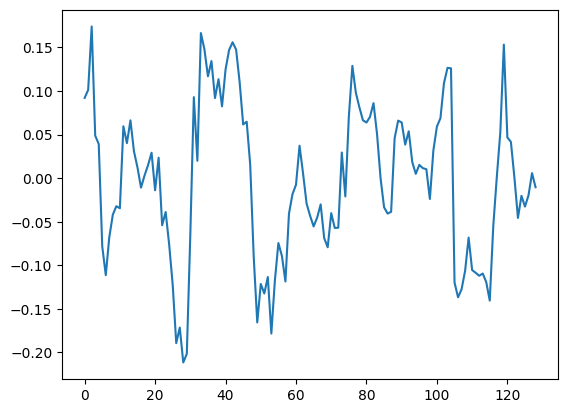

In [96]:
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
m = (model.transformer.wte.weight @ model.transformer.wte.weight.transpose(0,1)).detach().numpy()
eigs, eigvecs = np.linalg.eig(m)
plt.plot(eigvecs[:,5])
#plt.plot(m[91,:])

In [98]:
model.state_dict().keys()

odict_keys(['transformer.wte.weight', 'transformer.wpe.weight', 'transformer.h.0.c_attn.bias', 'transformer.h.0.c_attn.c_attn.weight', 'transformer.h.0.c_attn.c_attn.bias', 'transformer.h.0.c_attn.c_proj.weight', 'transformer.h.0.c_attn.c_proj.bias', 'transformer.h.0.c_fc.fc_1.weight', 'transformer.h.0.c_fc.fc_1.bias', 'transformer.h.0.c_fc.fc_2.weight', 'transformer.h.0.c_fc.fc_2.bias', 'transformer.h.0.ln_1.weight', 'transformer.h.0.ln_1.bias', 'transformer.h.0.ln_2.weight', 'transformer.h.0.ln_2.bias', 'transformer.h.1.c_attn.bias', 'transformer.h.1.c_attn.c_attn.weight', 'transformer.h.1.c_attn.c_attn.bias', 'transformer.h.1.c_attn.c_proj.weight', 'transformer.h.1.c_attn.c_proj.bias', 'transformer.h.1.c_fc.fc_1.weight', 'transformer.h.1.c_fc.fc_1.bias', 'transformer.h.1.c_fc.fc_2.weight', 'transformer.h.1.c_fc.fc_2.bias', 'transformer.h.1.ln_1.weight', 'transformer.h.1.ln_1.bias', 'transformer.h.1.ln_2.weight', 'transformer.h.1.ln_2.bias', 'transformer.h.2.c_attn.bias', 'transforme

In [114]:
model.transformer.h[0].c_attn.c_attn.weight.detach().numpy().shape
#eigvecs[:,0].shape

(192, 64)

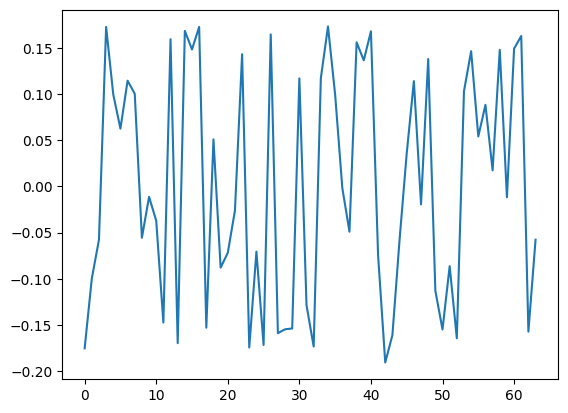

In [112]:
m = (model.transformer.wte.weight.transpose(0,1) @ model.transformer.wte.weight).detach().numpy()
eigs2, eigvecs2 = np.linalg.eig(m)
plt.plot(eigvecs2[:,1])

In [ ]:
plt.plot(model.lm_head(np.matmul(model.transformer.h[0].c_attn.c_attn.weight.detach().numpy(), eigvecs2[:,0])[:64]))